# Does VE Performance differ by Scene Category?

In [62]:
import os
import numpy as np
import pandas as pd
import scipy
from matplotlib import pyplot as plt

In [9]:
path = '/Users/prachimahableshwarkar/Documents/GW/Depth_MTurk/SUN_scene_cue_coding/Cleaned Scene Category Labels'

In [14]:
RA_sceneDistribution = {}
RA_scenePaths = {}

for file in os.listdir(path):  
    if 'ipynb' not in file:
        with open(path + '/' + file) as f:
            lines = f.readlines()[0]
            if lines in RA_sceneDistribution.keys():
                RA_sceneDistribution[lines] += 1
                RA_scenePaths[lines].append(file[:-10])
            else:
                RA_sceneDistribution[lines] = 1
                RA_scenePaths[lines] = [file[:-10]]
            
RA_scenePaths['lecture_room']

['002509_2014-06-24_13-19-22_094959634447_rgbf000077-resize',
 '003621_2014-05-23_18-06-08_094959634447_rgbf000101-resize',
 '003423_2014-05-21_10-23-26_094959634447_rgbf002665-resize',
 '002639_2014-06-24_14-51-37_094959634447_rgbf000074-resize',
 '003338_2014-05-20_11-01-23_094959634447_rgbf000051-resize',
 '003129_2014-05-12_10-48-10_094959634447_rgbf000100-resize',
 '003534_2014-05-22_15-06-10_094959634447_rgbf000102-resize',
 '003587_2014-05-23_16-48-02_094959634447_rgbf002384-resize',
 '000457_2014-06-08_16-52-43_260595134347_rgbf000199-resize']

#### Remove scene categories that have < X exemplars

In [107]:

trunc_RA_scenePaths = {}

for key in RA_sceneDistribution:
    if RA_sceneDistribution[key] > 8:
        trunc_RA_scenePaths[key] = RA_scenePaths[key]
        print(key, RA_sceneDistribution[key])
len(trunc_RA_scenePaths)

lecture_room 9
reading_room 13
bedroom 20
office 14
conference_room 15
waiting_room 13
cubicle_office 11
living_room 9


8

In [55]:
# TAC_raw_individual_trial_data_path = '/Users/prachi/Documents/depth_duration/depth_duration_analysis/TAC_npy_files/TAC_raw_individual_trial_data/'

TAC_raw_individual_trial_data_path  = '/Users/prachimahableshwarkar/Documents/GW/Depth_MTurk/depth_duration_analysis/TAC_npy_files/TAC_raw_individual_trial_data/'

# stim 
with open(TAC_raw_individual_trial_data_path + 'final_stim_250.npy' , 'rb') as f:
    stim_250 = np.load(f, allow_pickle=True)

with open(TAC_raw_individual_trial_data_path + 'final_stim_500.npy' , 'rb') as f:
    stim_500 = np.load(f, allow_pickle=True)
    
with open(TAC_raw_individual_trial_data_path + 'final_stim_750.npy' , 'rb') as f:
    stim_750 = np.load(f, allow_pickle=True)

with open(TAC_raw_individual_trial_data_path + 'final_stim_1000.npy' , 'rb') as f:
    stim_1000 = np.load(f, allow_pickle=True)

# x data
with open(TAC_raw_individual_trial_data_path + 'X_250.npy' , 'rb') as f:
    X_250 = np.load(f, allow_pickle=True)

with open(TAC_raw_individual_trial_data_path + 'X_500.npy' , 'rb') as f:
    X_500 = np.load(f, allow_pickle=True)
    
with open(TAC_raw_individual_trial_data_path + 'X_750.npy' , 'rb') as f:
    X_750 = np.load(f, allow_pickle=True)

with open(TAC_raw_individual_trial_data_path + 'X_1000.npy' , 'rb') as f:
    X_1000 = np.load(f, allow_pickle=True)

# y data 
with open(TAC_raw_individual_trial_data_path + 'final_y_250.npy' , 'rb') as f:
    y_250 = np.load(f, allow_pickle=True)
    
with open(TAC_raw_individual_trial_data_path + 'final_y_500.npy' , 'rb') as f:
    y_500 = np.load(f, allow_pickle=True)
    
with open(TAC_raw_individual_trial_data_path + 'final_y_750.npy' , 'rb') as f:
    y_750 = np.load(f, allow_pickle=True)
    
with open(TAC_raw_individual_trial_data_path + 'final_y_1000.npy' , 'rb') as f:
    y_1000= np.load(f, allow_pickle=True)

In [34]:
# TAC_raw_individual_trial_residuals_path = '/Users/prachi/Documents/depth_duration/depth_duration_analysis/TAC_npy_files/TAC_raw_individual_trial_residuals/'

TAC_raw_individual_trial_residuals_path = '/Users/prachimahableshwarkar/Documents/GW/Depth_MTurk/depth_duration_analysis/TAC_npy_files/TAC_raw_individual_trial_residuals/'

# residuals
with open(TAC_raw_individual_trial_residuals_path + 'residuals_250.npy' , 'rb') as f:
    residuals_250 = np.load(f, allow_pickle=True)

with open(TAC_raw_individual_trial_residuals_path + 'residuals_500.npy' , 'rb') as f:
    residuals_500 = np.load(f, allow_pickle=True)
    
with open(TAC_raw_individual_trial_residuals_path + 'residuals_750.npy' , 'rb') as f:
    residuals_750 = np.load(f, allow_pickle=True)

with open(TAC_raw_individual_trial_residuals_path + 'residuals_1000.npy' , 'rb') as f:
    residuals_1000 = np.load(f, allow_pickle=True)

In [37]:
stimfolder_250 = [elem.split('/')[1][:-2] for elem in stim_250]
stimfolder_500 = [elem.split('/')[1][:-2] for elem in stim_500]
stimfolder_750 = [elem.split('/')[1][:-2] for elem in stim_750]
stimfolder_1000 = [elem.split('/')[1][:-2] for elem in stim_1000]


In [100]:
sceneCategory_indeces = {}
for key in trunc_RA_scenePaths:
    img_list = trunc_RA_scenePaths[key]
    # indeces should be the same across durations
    img_indeces_250 = [stimfolder_250.index(elem) for elem in img_list]
#     img_indeces_500 = [stimfolder_500.index(elem) for elem in img_list]
#     img_indeces_750 = [stimfolder_750.index(elem) for elem in img_list]
#     img_indeces_1000 = [stimfolder_1000.index(elem) for elem in img_list]
    sceneCategory_indeces[key] = img_indeces_250

### Calculate average residuals for each scene category

In [101]:
sceneCategory_ref = []
avgresid_byCategory_250 = []
avgresid_byCategory_500 = []
avgresid_byCategory_750 = []
avgresid_byCategory_1000 = []

for key in sceneCategory_indeces:
    rvals250 = []
    rvals500 = []
    rvals750 = []
    rvals1000 = []
    for idx in sceneCategory_indeces[key]:
        rvals250.append(residuals_250[idx])
        rvals500.append(residuals_500[idx])
        rvals750.append(residuals_750[idx])
        rvals1000.append(residuals_1000[idx])
    
    avgresid_byCategory_250.append(np.mean(np.array(rvals250)))
    avgresid_byCategory_500.append(np.mean(np.array(rvals500)))
    avgresid_byCategory_750.append(np.mean(np.array(rvals750)))
    avgresid_byCategory_1000.append(np.mean(np.array(rvals1000)))
    sceneCategory_ref.append(key)


In [102]:
sceneCategory_ref

['lecture_room',
 'reading_room',
 'bedroom',
 'office',
 'conference_room',
 'waiting_room',
 'cubicle_office',
 'living_room']

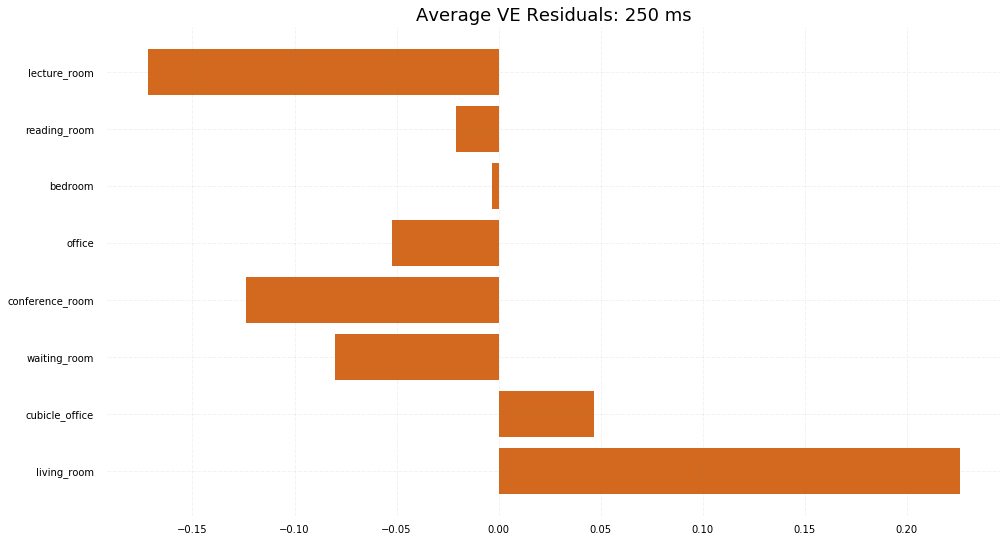

In [112]:

# Figure Size
fig, ax = plt.subplots(figsize =(16, 9))
 
# Horizontal Bar Plot
ax.barh(sceneCategory_ref, avgresid_byCategory_250, color='chocolate')
 
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)

ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
 
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
 
# Show top values
ax.invert_yaxis()
 
# Add annotation to bars
# for i in ax.patches:
#     plt.text(i.get_width()+0.2, i.get_y()+0.5,
#              str(round((i.get_width()), 2)),
#              fontsize = 10, fontweight ='bold',
#              color ='grey')
 
# Add Plot Title
ax.set_title('Average VE Residuals: 250 ms',
             loc ='center', fontsize=18)

 
# Show Plot
plt.show()

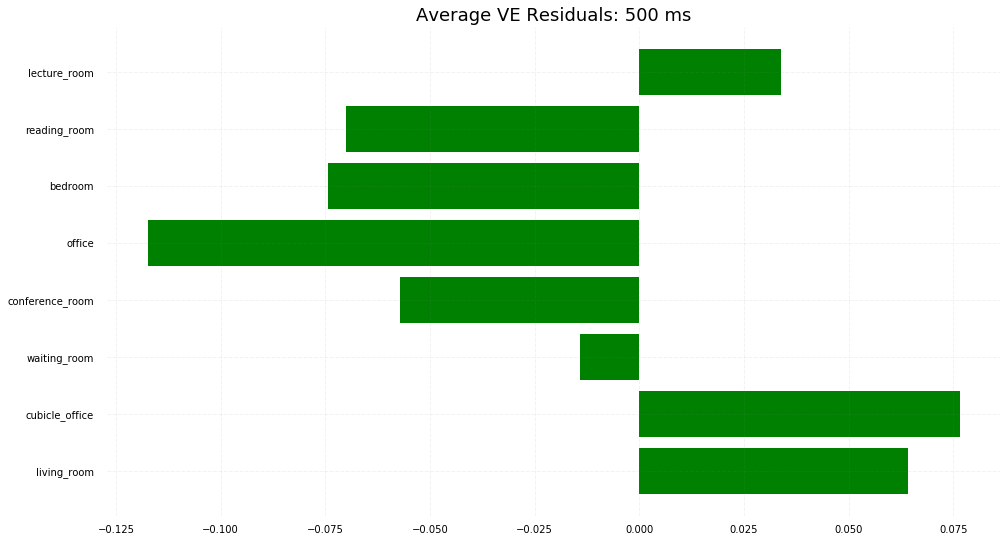

In [114]:
# Figure Size
fig, ax = plt.subplots(figsize =(16, 9))
 
# Horizontal Bar Plot
ax.barh(sceneCategory_ref, avgresid_byCategory_500, color='green')
 
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)

ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
 
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
 
# Show top values
ax.invert_yaxis()
 
# Add annotation to bars
# for i in ax.patches:
#     plt.text(i.get_width()+0.2, i.get_y()+0.5,
#              str(round((i.get_width()), 2)),
#              fontsize = 10, fontweight ='bold',
#              color ='grey')
 
# Add Plot Title
ax.set_title('Average VE Residuals: 500 ms',
             loc ='center', fontsize=18)

 
# Show Plot
plt.show()

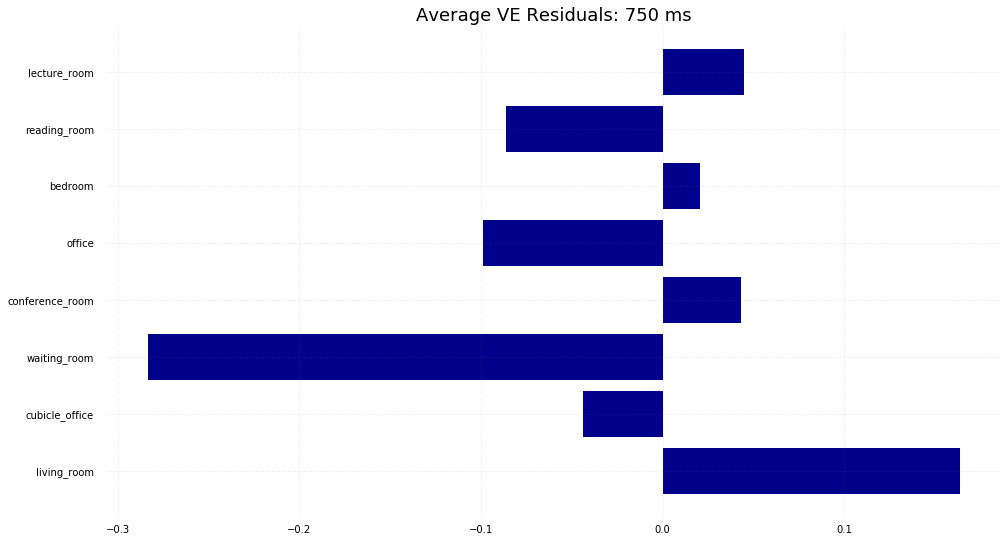

In [115]:
# Figure Size
fig, ax = plt.subplots(figsize =(16, 9))
 
# Horizontal Bar Plot
ax.barh(sceneCategory_ref, avgresid_byCategory_750, color='darkblue')
 
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)

ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
 
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
 
# Show top values
ax.invert_yaxis()
 
# Add annotation to bars
# for i in ax.patches:
#     plt.text(i.get_width()+0.2, i.get_y()+0.5,
#              str(round((i.get_width()), 2)),
#              fontsize = 10, fontweight ='bold',
#              color ='grey')
 
# Add Plot Title
ax.set_title('Average VE Residuals: 750 ms',
             loc ='center', fontsize=18)

 
# Show Plot
plt.show()

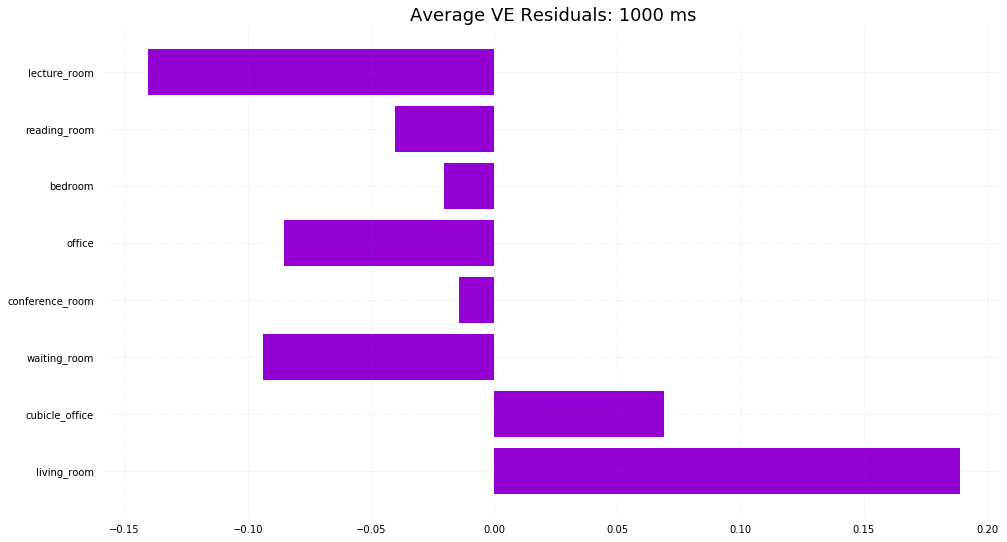

In [117]:
# Figure Size
fig, ax = plt.subplots(figsize =(16, 9))
 
# Horizontal Bar Plot
ax.barh(sceneCategory_ref, avgresid_byCategory_1000, color='darkviolet')
 
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)

ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
 
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
 
# Show top values
ax.invert_yaxis()
 
# Add annotation to bars
# for i in ax.patches:
#     plt.text(i.get_width()+0.2, i.get_y()+0.5,
#              str(round((i.get_width()), 2)),
#              fontsize = 10, fontweight ='bold',
#              color ='grey')
 
# Add Plot Title
ax.set_title('Average VE Residuals: 1000 ms',
             loc ='center', fontsize=18)

 
# Show Plot
plt.show()

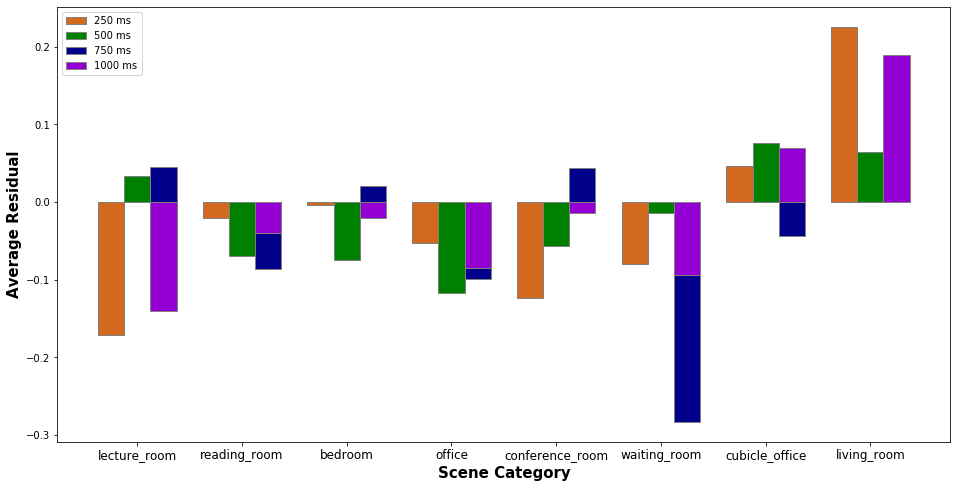

In [108]:
# set width of bar
barWidth = 0.25
fig = plt.subplots(figsize =(16, 8))
 
# Set position of bar on X axis
br1 = np.arange(len(avgresid_byCategory_250))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
 
# Make the plot
plt.bar(br1, avgresid_byCategory_250, color ='chocolate', width = barWidth,
        edgecolor ='grey', label ='250 ms')
plt.bar(br2, avgresid_byCategory_500, color ='green', width = barWidth,
        edgecolor ='grey', label ='500 ms')
plt.bar(br3, avgresid_byCategory_750, color ='darkblue', width = barWidth,
        edgecolor ='grey', label ='750 ms')
plt.bar(br3, avgresid_byCategory_1000, color ='darkviolet', width = barWidth,
        edgecolor ='grey', label ='1000 ms')
 
# Adding Xticks
plt.xlabel('Scene Category', fontweight ='bold', fontsize = 15)
plt.ylabel('Average Residual', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(avgresid_byCategory_250))],
           sceneCategory_ref, rotation=0, fontsize=12)
 
plt.legend()
plt.show()

# lecture_room 9
# reading_room 13
# bedroom 20
# office 14
# conference_room 15
# waiting_room 13
# cubicle_office 11
# living_room 9